In [4]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [5]:
archivo = '/home/rogve98/Documentos/C13(N)C1AS/Ciencia de Redes/Proyecto/Establecimientoseconomicos.csv'
datos = pd.read_csv(archivo,
#             nrows = 5,
            )

In [6]:
datos['Área Geográfica'].value_counts()

Nezahualcóyotl, Nezahualcóyotl    629
Name: Área Geográfica, dtype: int64

In [7]:
datos['Id Sector Económico'].value_counts()

461110    94
465311    53
463211    35
461122    32
461130    27
          ..
466314     1
431110     1
431191     1
435319     1
462111     1
Name: Id Sector Económico, Length: 74, dtype: int64

In [8]:
coordenadas = datos[['Latitud', 'Longitud']].values

In [9]:
N = len(coordenadas)

In [10]:
M = np.zeros([N, N])

In [11]:
for i in range(N):
    for j in range(N):
        x1,y1 = coordenadas[i]
        x2,y2 = coordenadas[j]
        M[i,j] = np.sqrt((x2-x1)**2 + (y2-y1)**2)

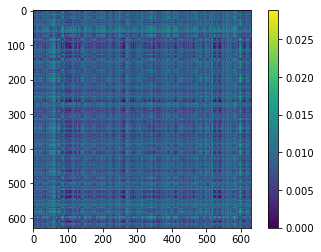

In [12]:
plt.imshow(M)
plt.colorbar()

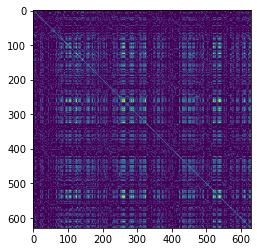

In [13]:
plt.imshow(M < 175/111111)

In [11]:
for h in np.arange(0.001,0.002, .00001):
    A = (M < h)*1
    G = nx.from_numpy_array(A)
    if nx.is_connected(G):
        print(h)
        break

0.0015600000000000015


In [14]:
M=(M<175/111111)*1
for i in range(629):
    M[i,i] = 0    

In [15]:
G = nx.from_numpy_array(M)
nx.is_connected(G)

True

In [16]:
len(G.edges)

17060

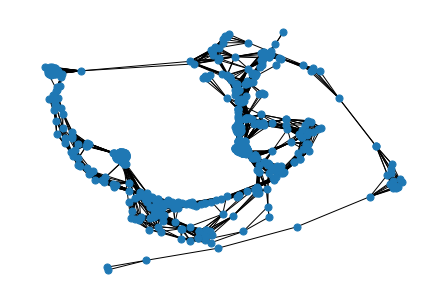

In [15]:
nx.draw(G, node_size = 50)

In [16]:
color = datos['Id Sector Económico'].values
color = color/color.max()

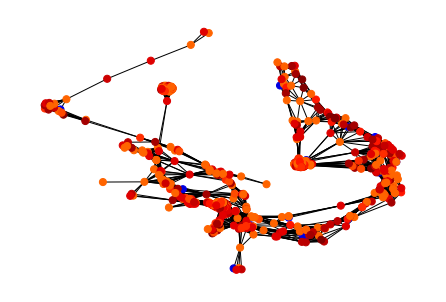

In [17]:
nx.draw(G, node_size = 50, node_color = color, cmap = 'jet')

In [18]:
pos = {}

for i in datos.index:
    pos[i] = (datos.loc[i,'Longitud'], datos.loc[i,'Latitud'])

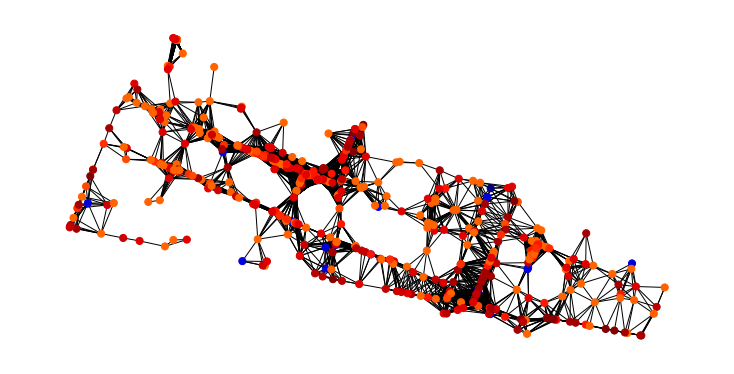

In [19]:
plt.figure(figsize = [10,5])
nx.draw(G, node_size = 50, node_color = color, cmap = 'jet', pos = pos)

#  Distribución de grado

In [20]:
from scipy.stats import binom 
from scipy.stats import poisson

In [21]:
N = len(G)
L = len(G.edges)
k = 2*L/N
C = nx.average_clustering(G)

p = k / (N-1)

In [22]:
p

0.08637712272032243

In [23]:
grado_dict = dict(nx.degree(G))
clustering_dict = nx.clustering(G)
# se genera el dataframe (la tabla)
df = pd.DataFrame([grado_dict, clustering_dict]).T
df.columns = ['Degree', 'Clustering']
df.Degree#.values
K=df.Degree.max()

In [24]:
y, x = np.histogram(df.Degree.values,bins = range(int(K)+1),density=True)

In [25]:
def enlacesAleatorios(N,p):
    for i in range(N):
        for j in range(i):
            if np.random.rand() < p:
                yield i,j
                
def redAleatoria(N,p):
    G = nx.Graph()
    G.add_nodes_from(range(N))
    G.add_edges_from(enlacesAleatorios(N,p))
    
    return G

In [26]:
G1 = redAleatoria(629,p)

N1 = len(G1)
L1 = len(G1.edges)
k1 = 2*L1/N1
C1 = nx.average_clustering(G1)

p1 = k1 / (N1-1)

In [27]:
grado_dict1 = dict(nx.degree(G1))
clustering_dict1 = nx.clustering(G1)
# se genera el dataframe (la tabla)
df1 = pd.DataFrame([grado_dict1, clustering_dict1]).T
df1.columns = ['Degree', 'Clustering']
df1.Degree#.values
K1=df1.Degree.max()
y1, x1 = np.histogram(df1.Degree.values,bins = range(int(K)+1),density=True)

In [28]:
K1

76.0

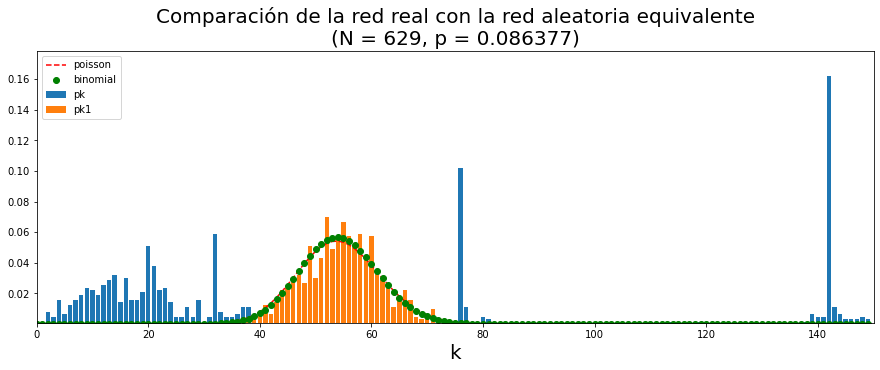

In [29]:
plt.figure(figsize = [15,5])
plt.bar(x[:-1], y, label = 'pk')
plt.plot(x[:-1], poisson.pmf(x[:-1], k), 'r--', label = 'poisson') 
plt.plot(x[:-1], binom.pmf(x[:-1],N-1, p), 'go', label = 'binomial') 
plt.bar(x1[:-1], y1, label = 'pk1')

plt.ylim([0.5*y[y>0].min(),1.1*y.max()])
plt.xlim([0,150])
plt.legend()
plt.title('Comparación de la red real con la red aleatoria equivalente\n(N = %i, p = %.6f)' %(N,p), size = 20)
plt.xlabel('k', size = 20)
plt.savefig("distpoibin")

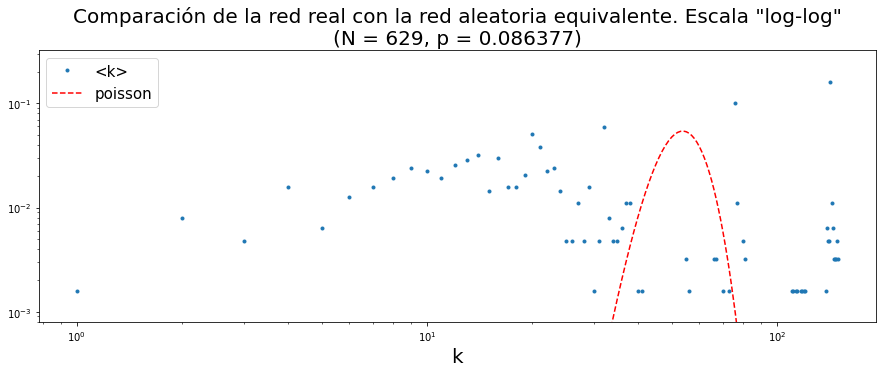

In [30]:
plt.figure(figsize = [15,5])
plt.plot(x[:-1], y, '.', label = '<k>')
plt.plot(x[:-1], poisson.pmf(x[:-1], k), 'r--', label = 'poisson')
#plt.plot(x[:-1], binom.pmf(x[:-1],N-1, p), 'go', label = 'binomial') 

#Se aplica escala logarítmica a ambos ejes
plt.xscale('log')
plt.yscale('log')

#parámetros adecuados para la visualización:
plt.ylim([0.5*y[y>0].min(),2*y.max()])


plt.title('Comparación de la red real con la red aleatoria equivalente. Escala "log-log"\n(N = %i, p = %.6f)' %(N,p), size = 20)
plt.xlabel('k', size = 20)

plt.legend(prop= {'size':15})
plt.savefig("DistPoi")

#  Independencia de escala


In [31]:
import powerlaw

In [32]:
log_bins = np.logspace(0,np.log10(K+2),20)

y0, x0 = np.histogram(df.Degree,
                     bins = range(int(K) + 2),
                     density = True)

y, x = np.histogram(df.Degree,
                    bins = log_bins,
                    density = True)

In [33]:
x

array([  1.        ,   1.30266838,   1.69694492,   2.2105565 ,
         2.87962206,   3.75119262,   4.88656003,   6.36556726,
         8.29222322,  10.80201703,  14.07144607,  18.33042792,
        23.87846892,  31.10572654,  40.52044654,  52.78470464,
        68.76096592,  89.57273639, 116.68357182, 152.        ])

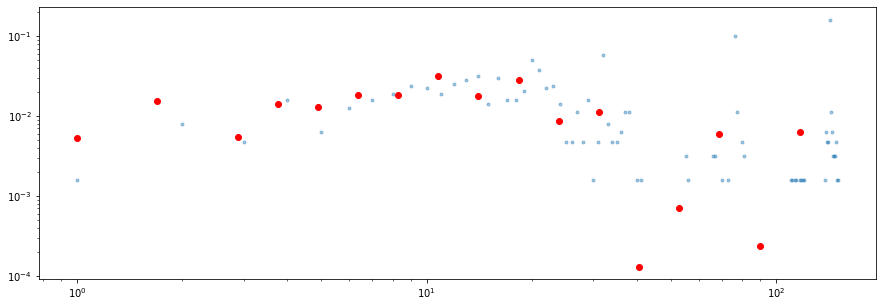

In [34]:
plt.figure(figsize = [15,5])
plt.plot(x[:-1],y,'ro')
plt.plot(x0[:-1],y0,'.',alpha = 0.4)
plt.xscale('log')
plt.yscale('log')

In [35]:
fit = powerlaw.Fit(df.Degree)

Calculating best minimal value for power law fit
/home/rogve98/anaconda3/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


In [36]:
fit.alphas

array([  1.28689878,   1.35740416,   1.41408841,   1.4675199 ,
         1.51259247,   1.56134899,   1.60565535,   1.64697589,
         1.68489833,   1.71748903,   1.74956271,   1.78307076,
         1.80883256,   1.82873275,   1.84186296,   1.8726363 ,
         1.88230695,   1.90759051,   1.93179502,   1.94775758,
         1.91461824,   1.89371774,   1.89347412,   1.88748342,
         1.89520139,   1.91893048,   1.94278843,   1.95416473,
         1.97743299,   1.97724063,   2.0061152 ,   2.02854542,
         1.92561092,   1.93302585,   1.94732471,   1.961351  ,
         1.97100923,   1.96748685,   1.98641699,   2.00653809,
         2.42025132,   2.44443293,   2.88293029,   2.92007738,
         3.07588198,   3.26270757,   3.47713275,   2.79434507,
         2.83336785,   2.83719913,   5.06688756,   5.1916409 ,
         5.49631344,   5.64722028,   6.24232694,   6.44583473,
         6.66482211,   6.90117419,  33.3090281 ,  42.73303672,
        58.04301786,  93.35937764, 249.62919793,  64.88

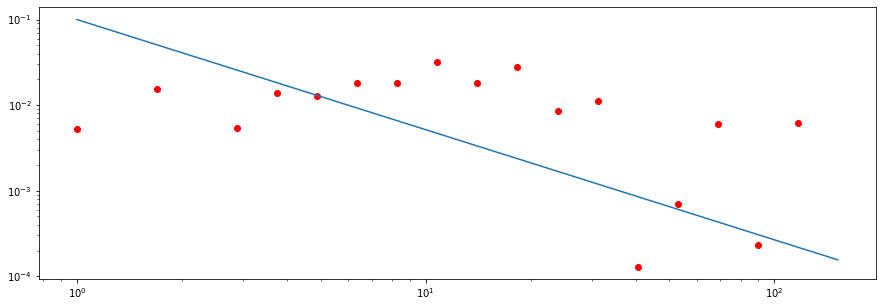

In [37]:
plt.figure(figsize = [15,5])
plt.plot(x[:-1],y,'ro')
plt.plot(x,0.1*x**(-fit.alphas[0]))
plt.xscale('log')
plt.yscale('log')

#  Percolación

In [17]:
import random

In [18]:
def percolacion_red(G,f,ataque=False):
    num_nodos_a_remover = int(f * G.number_of_nodes())

    if(ataque):
        nodos = [nodo for nodo,grado in sorted(G.degree(),key=lambda item:item[1],reverse=True)]
        nodos_a_remover = nodos[0:num_nodos_a_remover]
    else:
        nodos = list(G.nodes)
        nodos_a_remover = random.sample(nodos,num_nodos_a_remover)

    G.remove_nodes_from(nodos_a_remover)
    tamanio_max_comp = len(max(nx.connected_components(G),key=len))

    return tamanio_max_comp

In [19]:
def experimento_percolacion_redes(f_valores,repeticiones,ataque,generar_red_callback,*args):
    # listas donde se guardaran los resultados 
    # de las simulaciones
    promedios_tamanio_max_comp = []

    for f in f_valores:
        resultados_repeticiones_tamanio_max_comp = []
        for repeticion in range(repeticiones):
            # se crea una red ejecutando el callback
            # y pasándole los argumentos que necesita
            G = generar_red_callback(*args) 
            tamanio_comp = percolacion_red(G,f,ataque)
            resultados_repeticiones_tamanio_max_comp.append(tamanio_comp)

        promedio_tamanio_max_comp = np.mean(resultados_repeticiones_tamanio_max_comp)
        promedios_tamanio_max_comp.append(promedio_tamanio_max_comp)

    return promedios_tamanio_max_comp

In [21]:
# parámetros de las redes
N = len(G) # nodos

# parámetros experimentos
f_valores = np.arange(0,1,step=0.02)
repeticiones = 30

# corremos los experimentos y los guardamos
resultado_VA_falla = experimento_percolacion_redes(f_valores,repeticiones,
                                                   False,nx.from_numpy_array,M)
resultado_VA_ataque = experimento_percolacion_redes(f_valores,repeticiones,
                                                   True,nx.from_numpy_array,M)


# graficamos los resultados
x = f_valores
y1 = np.array(resultado_VA_falla)/N
y2 = np.array(resultado_VA_ataque)/N

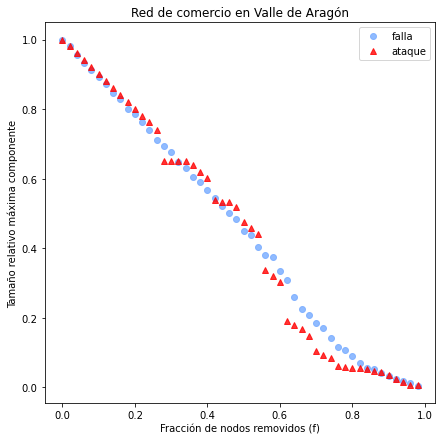

In [55]:
plt.figure(figsize=(7,7))

plt.plot(x,y1,'o',alpha=0.8,label='falla',color='#75AAFF')
plt.plot(x,y2,'r^',alpha=0.8,label='ataque',)#color='#75AAFF')
plt.title('Red de comercio en Valle de Aragón')
plt.ylabel('Tamaño relativo máxima componente')
plt.xlabel('Fracción de nodos removidos (f)')
plt.legend()
#plt.axvline(x=0.75,color="#CFCFCC",linestyle='--')
#plt.axvline(x=0.35,color="#CFCFCC",linestyle=':')

plt.show()